In [ ]:
pip install scikit-image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io,color
from skimage.util import img_as_ubyte

In [15]:
image=io.imread("car.jpg")

In [4]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[111,  99,  99],
        [109,  99,  98],
        [110, 100,  99],
        ...,
        [113, 112, 110],
        [118, 117, 115],
        [120, 119, 117]],

       [[113, 103, 102],
        [114, 104, 103],
        [116, 106, 105],
        ...,
        [112, 111, 109],
        [117, 116, 114],
        [120, 119, 117]],

       [[114, 104, 103],
        [115, 105, 104],
        [117, 109, 107],
        ...,
        [113, 112, 110],
        [118, 117, 115],
        [121, 120, 118]]

In [13]:
gray_image=color.rgb2gray(image)

In [ ]:
gray_image     

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.39823529, -0.39628588, -0.40020745, ..., -0.43948353,
        -0.45909137, -0.46693451],
       [-0.41197216, -0.41589373, -0.42373686, ..., -0.43556196,
        -0.4551698 , -0.46693451],
       [-0.41589373, -0.41981529, -0.43355216, ..., -0.43948353,
        -0.45909137, -0.47085608]])

In [8]:
gray_image.shape

(3376, 6000)

Text(0.5, 1.0, 'original image')

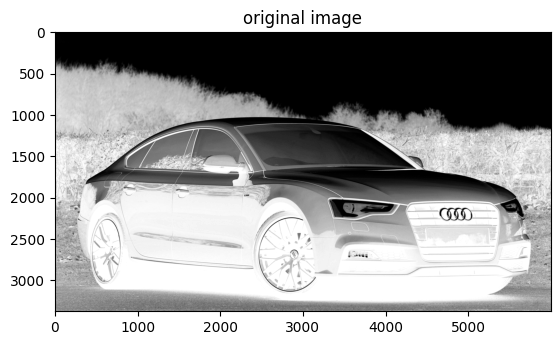

In [9]:
plt.imshow(gray_image,cmap="gray")
plt.title("original image")

In [12]:
image.shape

(3376, 6000, 3)

In [25]:
pca=PCA(n_components=0.95)

In [26]:
transformed_img=pca.fit_transform(gray_image)

In [27]:
reconstructed_image=pca.inverse_transform(transformed_img)

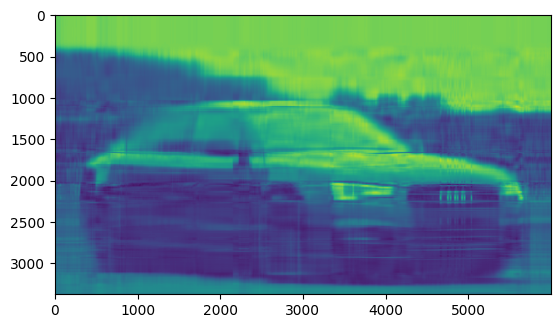

In [28]:
plt.imshow(reconstructed_image)

In [58]:
compress_img=((reconstructed_image-reconstructed_image.min())/(reconstructed_image.max()-reconstructed_image.min()))

In [59]:
compress_img

array([[0.74946601, 0.75141741, 0.75319685, ..., 0.79028303, 0.79017295,
        0.78930905],
       [0.74946601, 0.75141741, 0.75319685, ..., 0.79028303, 0.79017295,
        0.78930905],
       [0.74946601, 0.75141741, 0.75319685, ..., 0.79028303, 0.79017295,
        0.78930905],
       ...,
       [0.39524768, 0.3944341 , 0.39593677, ..., 0.41234561, 0.41056141,
        0.41071922],
       [0.39629807, 0.39544034, 0.39688263, ..., 0.41552648, 0.41361057,
        0.41376778],
       [0.39621931, 0.39528163, 0.39664933, ..., 0.41818183, 0.41618081,
        0.41631782]])

In [60]:
convert_img=img_as_ubyte(compress_img)

In [61]:
io.imsave("compressed_image.jpeg",convert_img)